## Machine Learning Assignment

In [1265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [1266]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [1267]:
df = pd.read_csv("C:/Users/m84005/Documents/personal/Mtech/MachineLearningAssignment/day.csv")

In [1268]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1269]:
df.shape

(730, 16)

In [1270]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1272]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1273]:
#here instant is an index column so dropping index column
df.drop(['instant'],axis=1,inplace=True)

In [1274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [1275]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Replacing categorical variables: season,weekday and weathersit with appropriate values





In [1276]:
df['weathersit'].replace({1:"ClearOrFewClouds",2:"MostCloudy",3:"LightRainOrLightSnowThunderstorm",4:'HeavyRainOrIcePalletsThunderstorm_Mist'},inplace=True)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,MostCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,MostCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,ClearOrFewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,ClearOrFewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,ClearOrFewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,spring,0,1,0,6,0,ClearOrFewClouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,spring,0,1,0,0,0,MostCloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,spring,0,1,0,1,1,MostCloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,spring,0,1,0,2,1,ClearOrFewClouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,spring,0,1,0,3,1,ClearOrFewClouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1277]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,Monday,1,MostCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,Tuesday,1,MostCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,Wednesday,1,ClearOrFewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,Thursday,1,ClearOrFewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,Friday,1,ClearOrFewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,spring,0,1,0,Saturday,0,ClearOrFewClouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,spring,0,1,0,Sunday,0,MostCloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,spring,0,1,0,Monday,1,MostCloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,spring,0,1,0,Tuesday,1,ClearOrFewClouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,spring,0,1,0,Wednesday,1,ClearOrFewClouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1278]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [1279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 85.7+ KB


In [1280]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [1281]:
def object_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

df[['mnth']] = df[['mnth']].apply(object_map)

In [1282]:
df.mnth.value_counts()

Jan    62
Dec    62
Mar    62
Aug    62
Oct    62
Jul    62
May    62
Jun    60
Apr    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [1283]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Monday,1,MostCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tuesday,1,MostCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wednesday,1,ClearOrFewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thursday,1,ClearOrFewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Friday,1,ClearOrFewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualization on the given data

In [1284]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

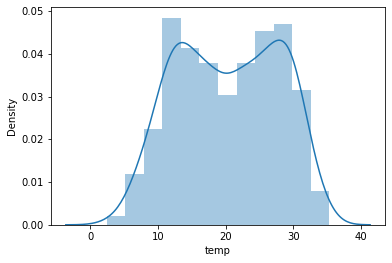

In [1285]:
#### Distplot on temp, atemp, hum, windspeed, casual, registered, cnt: 
sns.distplot(df['temp'])
plt.show();

In [1286]:
#### from above , it shows when temp low, then more ride takes

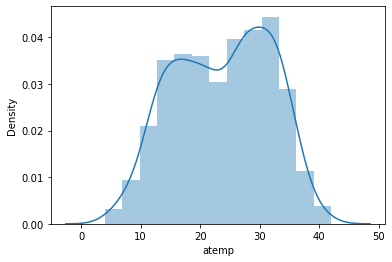

In [1287]:
sns.distplot(df['atemp'])
plt.show();

In [1288]:
#### the avg temp is mostly around 30

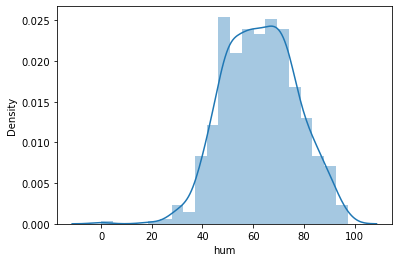

In [1289]:
sns.distplot(df['hum'])
plt.show();

In [1290]:
#####we can see hum count nearly 60.

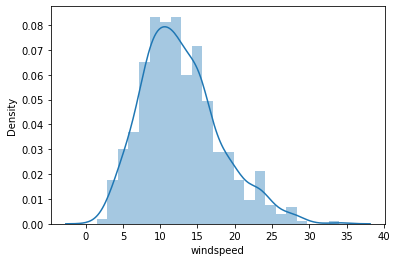

In [1291]:
sns.distplot(df['windspeed'])
plt.show();

In [1292]:
#### we can see the  windspeed is most when temp is nearly 10.

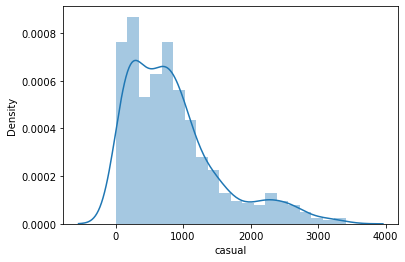

In [1293]:
sns.distplot(df['casual'])
plt.show();

In [1294]:
#### we can see here the casual ride is mostly between 0 to 1000

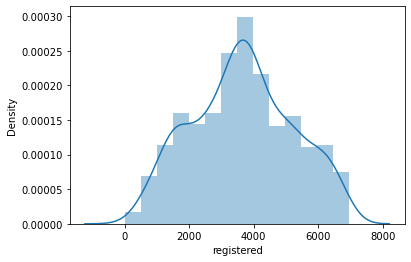

In [1295]:
sns.distplot(df['registered'])
plt.show();

In [1296]:
#### the registerd count most is around 4000.

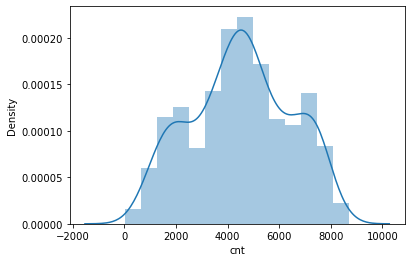

In [1297]:
sns.distplot(df['cnt'])
plt.show();

In [1298]:
#### we can see here that the maximum count is around 4000.

In [1299]:
###Pairplot to numeric veriables

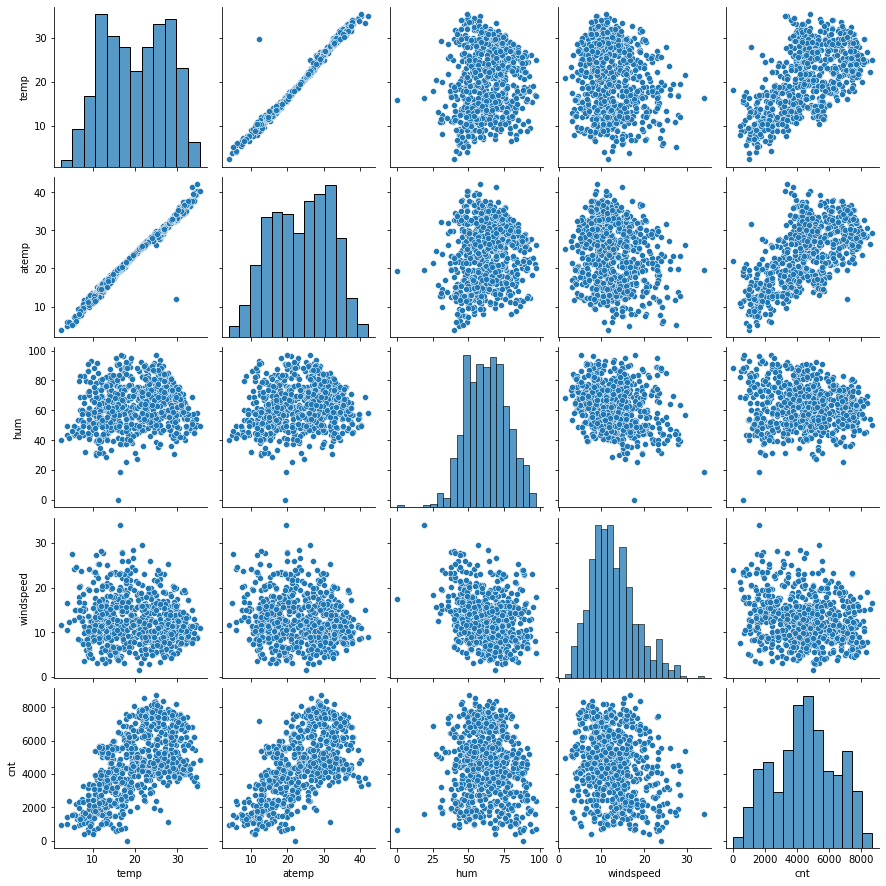

In [1300]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

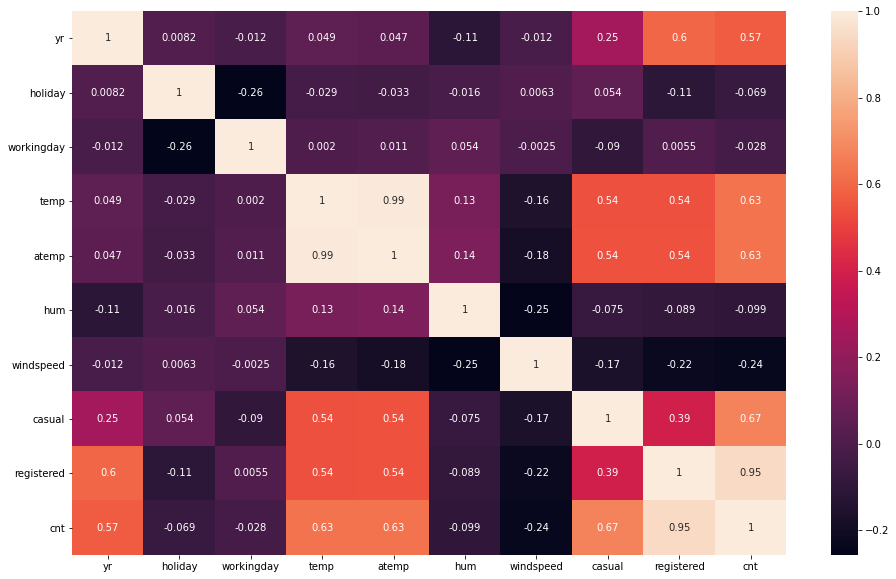

In [1301]:
#### checking the corerelation

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [1302]:

#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Monday,1,MostCloudy,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tuesday,1,MostCloudy,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wednesday,1,ClearOrFewClouds,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thursday,1,ClearOrFewClouds,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Friday,1,ClearOrFewClouds,11.46350,43.6957,12.522300,82,1518,1600


#### we can see here  correlation between temp and atemp is 0.99 which is almost 1

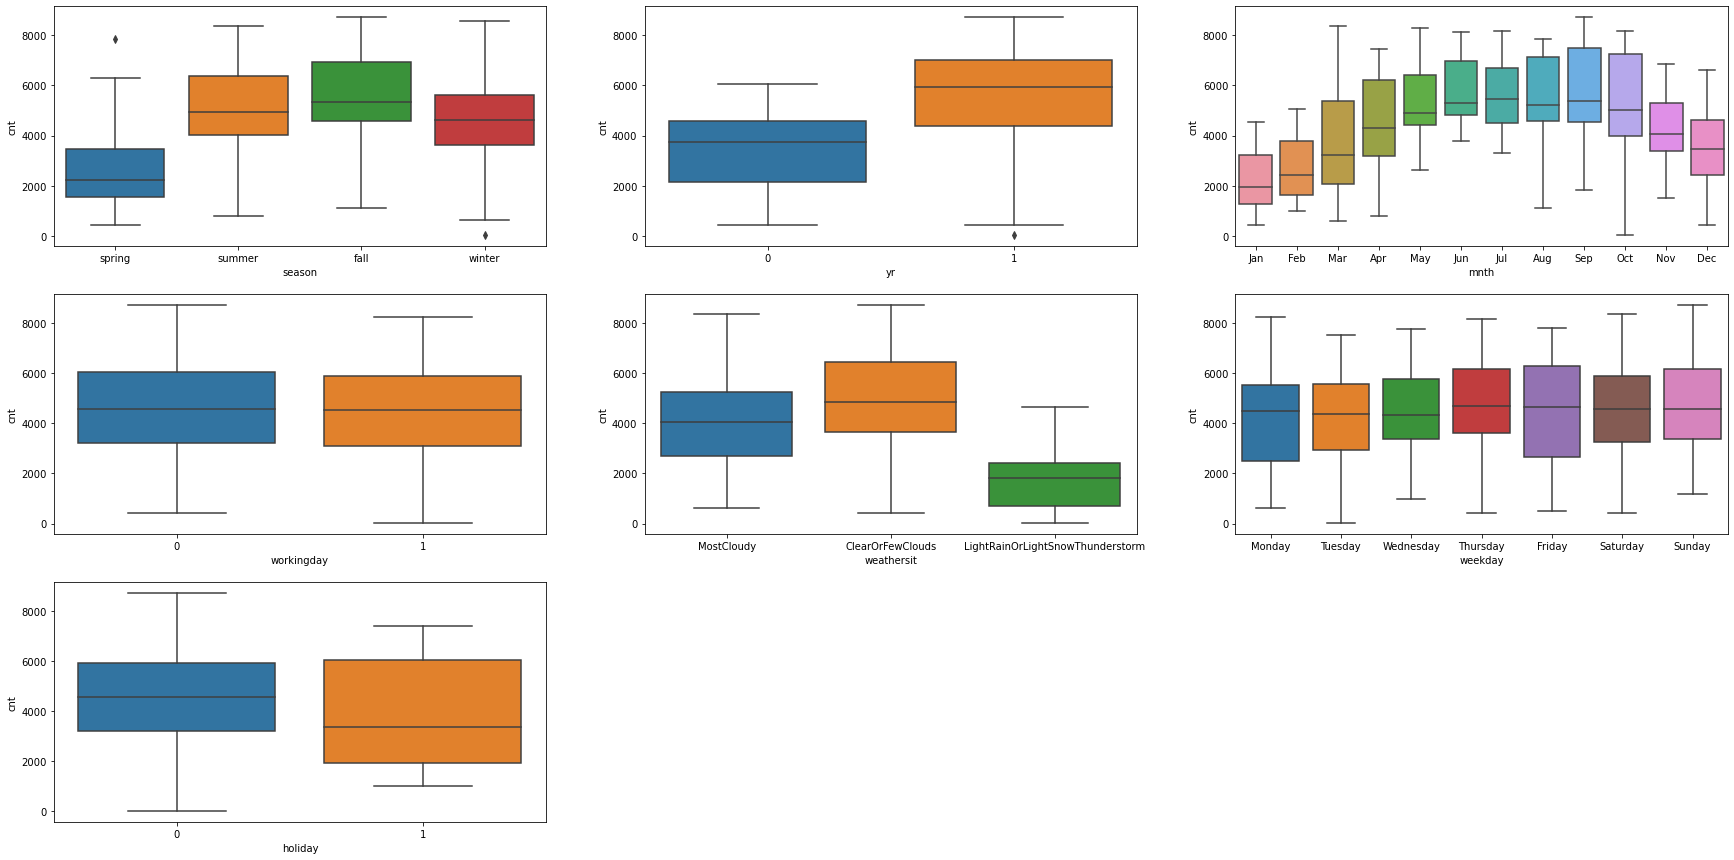

In [1303]:
### Visualising the categorical Variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

In [1304]:
### Making dummy variables

In [1305]:
#Convert variables once again to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 80.0+ KB


In [1306]:
### Dummy var for categorical data

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dteday                            730 non-null    object 
 1   season                            730 non-null    object 
 2   yr                                730 non-null    int64  
 3   mnth                              730 non-null    object 
 4   holiday                           730 non-null    int64  
 5   weekday                           730 non-null    object 
 6   workingday                        730 non-null    int64  
 7   weathersit                        730 non-null    object 
 8   atemp                             730 non-null    float64
 9   hum                               730 non-null    float64
 10  windspeed                         730 non-null    float64
 11  casual                            730 non-null    int64  
 12  register

In [1307]:
#Deleting the orginal columns season,weathersit,weekday,mnth

df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,dteday,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01-01-2018,0,0,1,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,0,0,1,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,0,0,1,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,0,0,1,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,0,0,1,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [1308]:
#### deleting 'dteday','casual','registered' column since its not required 
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data

In [1309]:
from sklearn.model_selection import train_test_split

# We specify this to make the train and test dataset always have the same rows respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1310]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1311]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1312]:
df_train.columns


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'LightRainOrLightSnowThunderstorm',
       'MostCloudy', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [1313]:
#### Scaling on the numerical data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1314]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1315]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1316]:
##### creating x and y
y_train = df_train.pop('cnt')
x_train = df_train

In [1317]:
x_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,LightRainOrLightSnowThunderstorm,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1318]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [1319]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1320]:
from sklearn.feature_selection import rfe
from sklearn.linear_model import LinearRegression


In [1321]:
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [1322]:
#### using REF approach 
#### starting with 15 approach and use mixed approach
rfe = RFE(lm, 15)            
rfe = rfe.fit(x_train, y_train)

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('LightRainOrLightSnowThunderstorm', True, 1),
 ('MostCloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 10),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [1323]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'LightRainOrLightSnowThunderstorm', 'MostCloudy', 'Aug', 'Dec', 'Feb',
       'Jan', 'Nov', 'Sep'],
      dtype='object')

In [1324]:
x_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Jul', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [1325]:
x_train_rfe = x_train[col]

In [1326]:

#### making model using STATSMODEL:

import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          1.26e-186
Time:                        19:44:03   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
8,MostCloudy,2.24
0,yr,2.06
12,Jan,1.92
13,Nov,1.85
10,Dec,1.63


In [1328]:
x_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,summer,winter,LightRainOrLightSnowThunderstorm,MostCloudy,Aug,Dec,Feb,Jan,Nov,Sep
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0


In [1329]:
#COLUMN hum has very high VIF, so dropping it.
x_train_rfe=x_train_rfe.drop(['hum'],axis=1)
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm1 = sm.OLS(y_train,x_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          7.00e-184
Time:                        19:44:03   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
12,Nov,1.81
8,Aug,1.59
7,MostCloudy,1.57
9,Dec,1.41
13,Sep,1.35


In [1331]:
#COLUMN atemp has very high VIF, so dropping it.
x_train_rfe=x_train_rfe.drop(['atemp'],axis=1)
import statsmodels.api as sm  
x_train_rfe2 = sm.add_constant(x_train_rfe)
lm2 = sm.OLS(y_train,x_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          6.20e-149
Time:                        19:44:03   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1332]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
4,winter,2.49
0,yr,1.85
3,summer,1.80
11,Nov,1.80
6,MostCloudy,1.55
8,Dec,1.40
10,Jan,1.27
9,Feb,1.26
7,Aug,1.24


In [1333]:
#Dropping windspeed because of high VIF
x_train_rfe=x_train_rfe.drop(['windspeed'],axis=1)
import statsmodels.api as sm  
x_train_rfe3 = sm.add_constant(x_train_rfe)
lm3 = sm.OLS(y_train,x_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          4.35e-137
Time:                        19:44:04   Log-Likelihood:                 382.62
No. Observations:                 510   AIC:                            -739.2
Df Residuals:                     497   BIC:                            -684.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1334]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,2.39
10,Nov,1.77
0,yr,1.71
5,MostCloudy,1.53
7,Dec,1.37
2,summer,1.36
6,Aug,1.16
9,Jan,1.15
11,Sep,1.14
8,Feb,1.09


In [1335]:
#Dropping winter because of high VIF
x_train_rfe=x_train_rfe.drop(['winter'],axis=1)
import statsmodels.api as sm  
x_train_rfe4 = sm.add_constant(x_train_rfe)
lm4 = sm.OLS(y_train,x_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.4
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          6.54e-132
Time:                        19:44:04   Log-Likelihood:                 367.80
No. Observations:                 510   AIC:                            -711.6
Df Residuals:                     498   BIC:                            -660.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1336]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.63
4,MostCloudy,1.47
2,summer,1.33
5,Aug,1.15
8,Jan,1.14
9,Nov,1.13
10,Sep,1.13
6,Dec,1.10
7,Feb,1.08
1,holiday,1.06


In [1337]:
#Dropping summer because of high P-Value
x_train_rfe=x_train_rfe.drop(['summer'],axis=1)
import statsmodels.api as sm  
x_train_rfe5 = sm.add_constant(x_train_rfe)
lm5 = sm.OLS(y_train,x_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     131.5
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          6.15e-133
Time:                        19:44:04   Log-Likelihood:                 367.70
No. Observations:                 510   AIC:                            -713.4
Df Residuals:                     499   BIC:                            -666.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
3,MostCloudy,1.34
4,Aug,1.11
7,Jan,1.10
8,Nov,1.10
9,Sep,1.10
5,Dec,1.07
1,holiday,1.06
6,Feb,1.06
2,LightRainOrLightSnowThunderstorm,1.02


In [1339]:
#Dropping yr because of high VIF
x_train_rfe=x_train_rfe.drop(['yr'],axis=1)
import statsmodels.api as sm  
x_train_rfe6 = sm.add_constant(x_train_rfe)
lm6 = sm.OLS(y_train,x_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     41.38
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           4.10e-55
Time:                        19:44:04   Log-Likelihood:                 180.47
No. Observations:                 510   AIC:                            -340.9
Df Residuals:                     500   BIC:                            -298.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MostCloudy,1.27
6,Jan,1.07
7,Nov,1.07
8,Sep,1.07
0,holiday,1.06
3,Aug,1.05
4,Dec,1.05
5,Feb,1.04
1,LightRainOrLightSnowThunderstorm,1.02


In [1341]:
#Dropping MostCloudy because of high VIF
x_train_rfe=x_train_rfe.drop(['MostCloudy'],axis=1)
import statsmodels.api as sm  
x_train_rfe7 = sm.add_constant(x_train_rfe)
lm7 = sm.OLS(y_train,x_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     39.96
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           3.26e-49
Time:                        19:44:04   Log-Likelihood:                 164.37
No. Observations:                 510   AIC:                            -310.7
Df Residuals:                     501   BIC:                            -272.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,1.06
6,Nov,1.04
1,LightRainOrLightSnowThunderstorm,1.02
4,Feb,1.01
5,Jan,1.01
7,Sep,1.01
2,Aug,1.00
3,Dec,1.00


In [1343]:
### we can see lm6 is very good fit.

Text(0.5, 0, 'Errors')

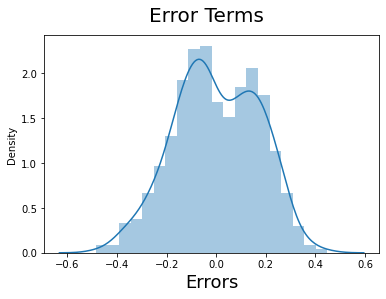

In [1344]:
#### now we can see our %th model is fine.

#Predict values
y_train_cnt = lm6.predict(x_train_rfe6)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#CALCULATING RESIDUALS

res=y_train - y_train_cnt

#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1345]:
#Checking columns
x_train_rfe6.columns

Index(['const', 'holiday', 'LightRainOrLightSnowThunderstorm', 'MostCloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep'],
      dtype='object')

In [1346]:
#Creating x and y sets

y_test = df_test.pop('cnt')
x_test = df_test

x_train_new=x_train_rfe6.drop(['const'], axis=1)

# Now let's use our model to make predictions.
# Creating x_test_new dataframe by dropping variables from x_test

x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

x_train_rfe6.columns

Index(['const', 'holiday', 'LightRainOrLightSnowThunderstorm', 'MostCloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep'],
      dtype='object')

Text(0, 0.5, 'y_pred')

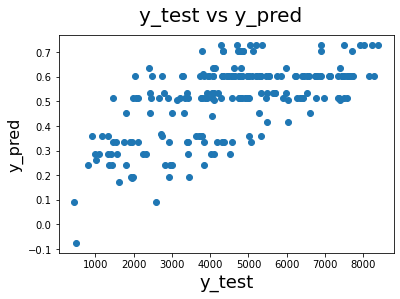

In [1347]:
#Making predictions on the chosen model

y_pred = lm6.predict(x_test_new)

#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) #-- Plot heading 
plt.xlabel('y_test', fontsize=18)             #-- x-label
plt.ylabel('y_pred', fontsize=16)   

In [1351]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))



4925.283852179894

In [1354]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

-5.760328694789228

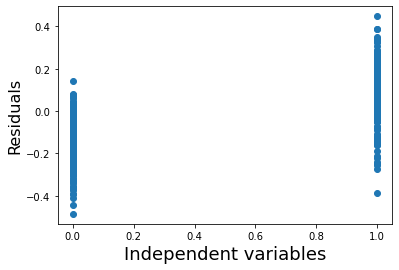

In [1349]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
X_t=X_train_new.iloc[:,0].values
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()


In [1353]:
print(x_train_rfe6.columns)
print(lm6.summary())

Index(['const', 'holiday', 'LightRainOrLightSnowThunderstorm', 'MostCloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     41.38
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           4.10e-55
Time:                        19:46:02   Log-Likelihood:                 180.47
No. Observations:                 510   AIC:                            -340.9
Df Residuals:                     500   BIC:                            -298.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err       

### So The best fitted line according to the model would be:

#### cnt=-0.0971 * holiday -0.3612 * LightRainOrLightSnowThunderstorm - 0.0925* MostCloudy + 0.1001 * Aug -0.1514 * Dec -0.2709 * 
 ####       Feb -0.3176 * Jan -0.0707 * Nov + 0.1232* Sep

#### -- The demand much in Aug and Sept.

#### -- The demand less depends on holidays, Light rain or light thunderstorm, most cloudy, dec, feb,Jan,Nov.